# Bayes ratios

In [6]:
import numpy as np 
root = '/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/skymap.npy'

data = np.load(root)
alphas = data[:,0]
deltas = data[:,1]
betas = data[:,2]



In [38]:
from mw_plot import mw_radec

def convert_ra(x,org):


    xnew = np.remainder(x+360-org,360) # shift RA values
    ind = xnew>180
    xnew[ind] -=360    # scale conversion to [-180, 180]
    xnew=-xnew    # reverse the scale: East to the left

    return xnew


def degrees_to_hours(x):


    return x/15.0



def plot_mwd(RA,Dec,z,source_ra,source_dec,org=0,projection='mollweide',cmap='viridis',savefig=None):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    modified from https://balbuceosastropy.blogspot.com/2013/09/the-mollweide-projection.html
    '''
    
    
    x = convert_ra(RA,org)
    x_source = convert_ra(source_ra,org)
    
    
    #Setup the figure
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection)

    fs = 20
    
    
    #Plot the pulsars
    #sc = ax.scatter(np.radians(x),np.radians(Dec),c=z,cmap=cmap)  # convert degrees to radians




    #X,Y = np.meshgrid(np.radians(x), np.radians(Dec))
    # Sort coordinates and reshape in grid
    y_data = np.radians(Dec)
    x_data = np.radians(x)
    sc = ax.tricontourf(x_data, y_data, z)
    ax.scatter(x_data, y_data)
    ax.scatter(np.radians(x_source), np.radians(source_dec), c='C1',s=100)




    #Colorbar of distance
    cbar = plt.colorbar(sc,orientation='horizontal',fraction=0.06, pad=0.075,cmap=cmap)
    cbar.ax.set_xlabel('d [kpc]', rotation=0,fontsize=fs)



    mw_plane_ra, mw_plane_dec = mw_radec(deg=True)  # RA/DEC arrays of milkyway plane in degs
    mw_plane_ra = convert_ra(mw_plane_ra,org)
    ax.plot(np.radians(mw_plane_ra),np.radians(mw_plane_dec),c='0.5', linestyle='--')  # convert degrees to radians


    #Formatting
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    tick_labels = degrees_to_hours(tick_labels)

    string_tick_labels = [str(int(i))+'h' for i in tick_labels]
    ax.set_xticklabels(string_tick_labels)     # we add the scale on the x axis


    #ax.set_xlabel("Right Ascension",fontsize=fs)
    #ax.set_ylabel("Declination", fontsize=fs)
    ax.xaxis.set_tick_params(labelsize=fs-4)
    ax.yaxis.set_tick_params(labelsize=fs-4)
    cbar.ax.xaxis.set_tick_params(labelsize=fs-4)
    cbar.ax.xaxis.set_major_locator(plt.MaxNLocator(7))


    
    ax.grid(True)



    if savefig != None:
        plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)


    plt.show()

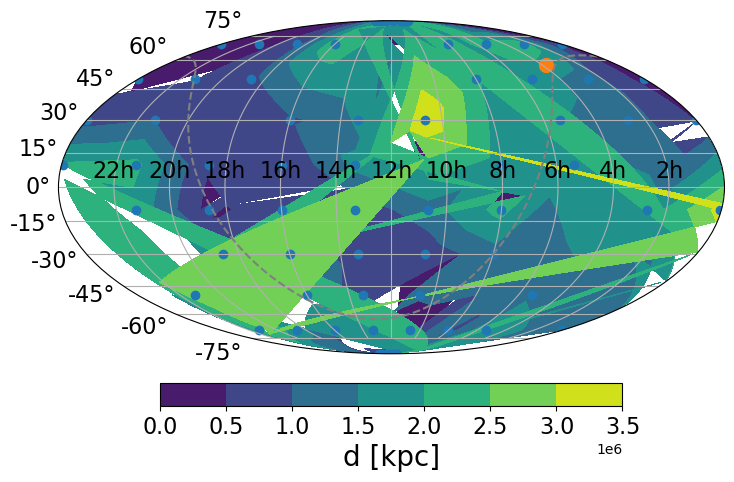

In [40]:
source_ra = np.array([1.0])
source_dec = np.array([1.0])
plot_mwd(np.rad2deg(alphas) ,np.rad2deg(deltas),betas,np.rad2deg(source_ra),np.rad2deg(source_dec),org=180, projection='mollweide',savefig=None)



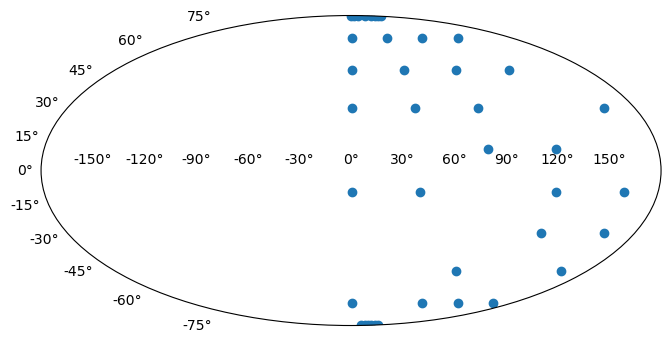

In [8]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(alphas, deltas)

In [2]:
import pandas as pd 
y = data
x = alphas
z = SNR_array

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
heatmap = ax.pcolormesh(x, y, z, cmap='viridis')

ax.grid(True,color='white')
cbar = plt.colorbar(heatmap,orientation='horizontal',pad=0.03)
cbar.set_label(r"$\Lambda$", fontsize=16)



# #Plot the BH location
# ra_BH = 1.0
# dec_BH = 1.0
# ax.scatter(ra_BH,dec_BH,c='r',s=100,marker='8')



#Plot the PSR locations
pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
dec_psr = pulsars["DECJD"].to_numpy()
ra_psr = pulsars["RAJD"].to_numpy()
ra_psr = ((ra_psr+np.pi) % 2*np.pi)-np.pi


ax.scatter(ra_psr,dec_psr,c='C2',s=100,marker='^')


#Make the longitude labels white
for ticklabel in ax.get_xticklabels():
    ticklabel.set_color("white")



plt.savefig(f"../data/images/snr_mollewide.png", bbox_inches="tight",dpi=300)



[]

In [15]:

import numpy as np 
N = len(list_of_model_files)

strains = np.zeros(N)
bayes_factors = np.zeros(N) 
for i in range(N):
    print(i)
    assert parse_filename(list_of_model_files[i]),parse_filename(list_of_null_files[i]) #check h of each file is the same

    strains[i] = parse_filename(list_of_model_files[i])
    bayes_factors[i] =  bayes_factor(list_of_model_files[i],list_of_null_files[i])
 



0
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratios/paper_bayes_ratios_v1_h_1.0232929922807536e-13_model_earth_seed_1237_result.json 574185.1909276376
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratios/paper_bayes_ratios_v1_h_1.0232929922807536e-13_model_null_seed_1237_result.json 554431.282720222
1
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratios/paper_bayes_ratios_v1_h_1.0471285480508985e-14_model_earth_seed_1237_result.json 585617.1230522403
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratios/paper_bayes_ratios_v1_h_1.0471285480508985e-14_model_null_seed_1237_result.json 585415.9150653348
2
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratios/paper_bayes_ratios_v1_h_1.071519305237605e-15_model_earth_seed_1237_result.json 585732.1045079374
/Users/t1/github_r

In [16]:
#sort in order of strain
p = strains.argsort()
x = strains[p]
y = bayes_factors[p]

In [17]:
#Save output as np array
data_output = np.zeros((len(x),2))
data_output[:,0] = x 
data_output[:,1] = y
np.save("../data/PaperBayesFile",data_output)

In [18]:
import numpy as np 
data = np.load("../data/PaperBayesFile.npy") 
x = data[:,0]
y = data[:,1]

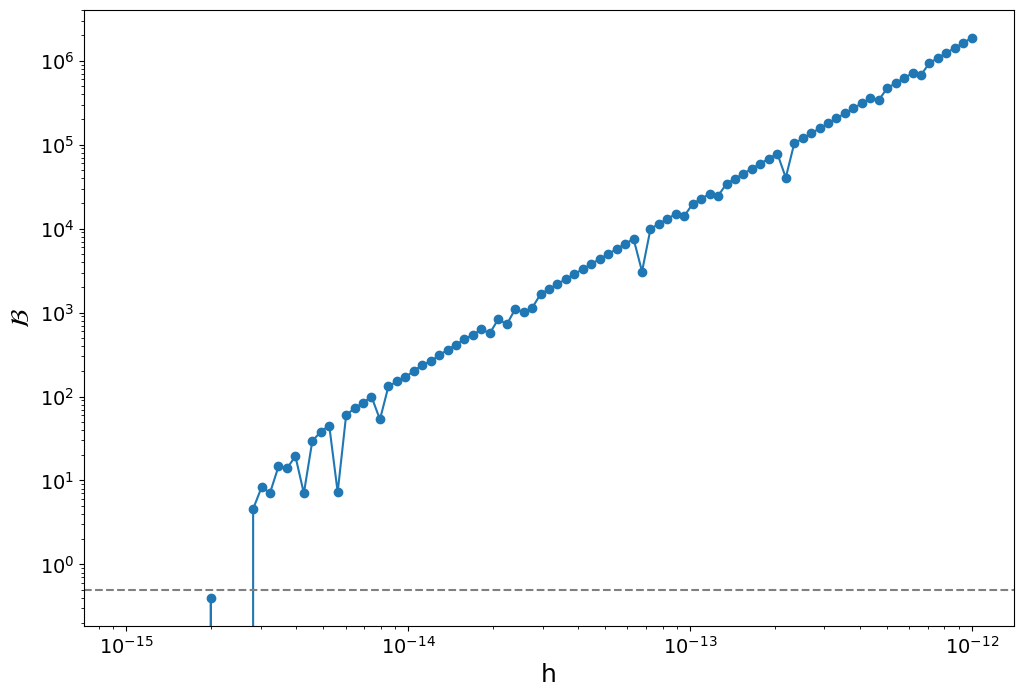

In [19]:
import matplotlib.pyplot as plt 
import scienceplots


h,w = 12,8
rows = 1
cols = 1
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))


ax.scatter(x,y)
ax.plot(x,y)






ax.set_xscale('log')
ax.set_yscale('log')



fs=18
ax.set_xlabel('h', fontsize=fs)
ax.set_ylabel(r'$\mathcal{B}$', fontsize=fs)

ax.xaxis.set_tick_params(labelsize=fs-4)
ax.yaxis.set_tick_params(labelsize=fs-4)

ax.axhline(0.5,linestyle='--', c='0.5')

plt.savefig(f"../data/images/PaperBayesRatioPlot_stacked.png", bbox_inches="tight",dpi=300)
